In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


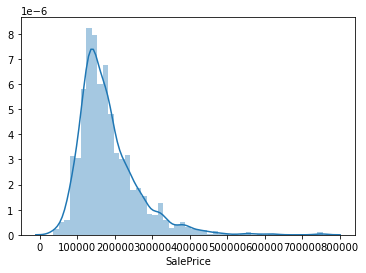

In [8]:
sns.distplot(train['SalePrice'])

In [9]:
train.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [10]:
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [11]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
missing = test.isnull().sum()
missing = missing[missing>0]
train.drop(missing.index, axis=1, inplace=True)
train.drop(['Electrical'], axis=1, inplace=True)

test.dropna(axis=1, inplace=True)
test.drop(['Electrical'], axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [14]:
labelencoder = LabelEncoder()

In [15]:
train_num = train.select_dtypes(exclude=[np.number])

In [16]:
test_num = test.select_dtypes(exclude=[np.number])

In [17]:
train_label=[]
test_label=[]

In [18]:
for col in train_num.columns: 
    train_label.append(col)
for col in test_num.columns: 
    test_label.append(col)

In [19]:
for i in train_label:
    train[i] = labelencoder.fit_transform(train[i])

In [20]:
for i in test_label:
    test[i] = labelencoder.fit_transform(test[i])

In [21]:
test

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,1,3,3,4,0,12,1,...,140,0,0,0,120,0,0,6,2010,4
1,1462,20,14267,1,0,3,0,0,12,2,...,393,36,0,0,0,0,12500,6,2010,4
2,1463,60,13830,1,0,3,4,0,8,2,...,212,34,0,0,0,0,0,3,2010,4
3,1464,60,9978,1,0,3,4,0,8,2,...,360,36,0,0,0,0,0,6,2010,4
4,1465,120,5005,1,0,1,4,0,22,2,...,0,82,0,0,144,0,0,1,2010,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,1,3,3,4,0,10,2,...,0,0,0,0,0,0,0,6,2006,4
1455,2916,160,1894,1,3,3,4,0,10,2,...,0,24,0,0,0,0,0,4,2006,0
1456,2917,20,20000,1,3,3,4,0,11,2,...,474,0,0,0,0,0,0,9,2006,0
1457,2918,85,10441,1,3,3,4,0,11,2,...,80,32,0,0,0,0,700,7,2006,4


In [22]:
train


,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,8450,1,3,3,4,0,5,2,...,61,0,0,0,0,0,2,2008,4,208500
1,2,20,9600,1,3,3,2,0,24,1,...,0,0,0,0,0,0,5,2007,4,181500
2,3,60,11250,1,0,3,4,0,5,2,...,42,0,0,0,0,0,9,2008,4,223500
3,4,70,9550,1,0,3,0,0,6,2,...,35,272,0,0,0,0,2,2006,0,140000
4,5,60,14260,1,0,3,2,0,15,2,...,84,0,0,0,0,0,12,2008,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,1,3,3,4,0,8,2,...,40,0,0,0,0,0,8,2007,4,175000
1456,1457,20,13175,1,3,3,4,0,14,2,...,0,0,0,0,0,0,2,2010,4,210000
1457,1458,70,9042,1,3,3,4,0,6,2,...,60,0,0,0,0,2500,5,2010,4,266500
1458,1459,20,9717,1,3,3,4,0,12,2,...,0,112,0,0,0,0,4,2010,4,142125


In [23]:
#train=pd.get_dummies(train)

In [24]:
#test=pd.get_dummies(test)

In [25]:
test.equals(train)

False

In [26]:
X_train=train.drop('SalePrice',axis=1).values
y_train=train['SalePrice'].values
X_test=test.to_numpy()


In [27]:
X_train

array([[    1,    60,  8450, ...,     2,  2008,     4],
       [    2,    20,  9600, ...,     5,  2007,     4],
       [    3,    60, 11250, ...,     9,  2008,     4],
       ...,
       [ 1458,    70,  9042, ...,     5,  2010,     4],
       [ 1459,    20,  9717, ...,     4,  2010,     4],
       [ 1460,    20,  9937, ...,     6,  2008,     4]])

In [28]:
len(X_train)

1460

In [29]:
len(X_test)


1459

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)



In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler()

In [34]:
X_train=scaler.fit_transform(X_train)

In [35]:
X_test=scaler.fit_transform(X_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [37]:
X_train.shape

(1460, 46)

In [38]:
X_test.shape

(1459, 46)

In [39]:
input_layer = Input(shape=(X_train.shape[1],))
dense_layer_1 = Dense(512, activation='relu')(input_layer)
dense_layer_2 = Dense(512, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(512, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(512, activation='relu')(dense_layer_3)
dense_layer_5 = Dense(256, activation='relu')(dense_layer_4)
output = Dense(1)(dense_layer_5)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [40]:
history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
584/584 [==============================] - 2s 3ms/step - loss: 5112982016.0000 - mean_squared_error: 5112982016.0000 - val_loss: 2516080640.0000 - val_mean_squared_error: 2516080640.0000
Epoch 2/100
584/584 [==============================] - 1s 2ms/step - loss: 1561511040.0000 - mean_squared_error: 1561511040.0000 - val_loss: 2039012608.0000 - val_mean_squared_error: 2039012608.0000
Epoch 3/100
584/584 [==============================] - 1s 2ms/step - loss: 1419117184.0000 - mean_squared_error: 1419117184.0000 - val_loss: 2113413248.0000 - val_mean_squared_error: 2113413248.0000
Epoch 4/100
584/584 [==============================] - 2s 3ms/step - loss: 1316282752.0000 - mean_squared_error: 1316282752.0000 - val_loss: 2233278208.0000 - val_mean_squared_error: 2233278208.0000
Epoch 5/100
584/584 [==============================] - 1s 2ms/step - loss: 1275610880.0000 - mean_squared_error: 1275610880.0000 - val_loss: 2081499008.0000 - val_mean_squared_error: 2081499008.0000
Epoch

In [41]:
pred=(model.predict(X_test))

In [42]:
pred_values=[]

In [43]:
for i in pred.tolist():
    pred_values.append(i[0])

In [44]:
output = pd.DataFrame({'Id': test.Id, 'SalePrice': pred_values})

In [45]:
output.to_csv('submission.csv', index=False)